In [1]:
"""Density plots of review counts per user"""

import load
import matplotlib.pyplot as plt

df = load.loadDF(1e11)



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068055 entries, 0 to 2068054
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   overall         float64
 1   verified        bool   
 2   reviewTime      object 
 3   reviewerID      object 
 4   asin            object 
 5   style           object 
 6   reviewerName    object 
 7   reviewText      object 
 8   summary         object 
 9   unixReviewTime  int64  
 10  vote            object 
 11  image           object 
 12  category        object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 191.3+ MB


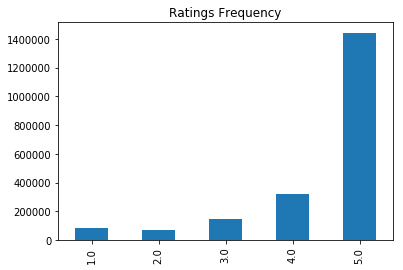

In [3]:
"""Group the data by reviewerID and take frequeny
of reviews posted. Plot the histograms"""

fig, ax = plt.subplots()
freq = df['overall'].value_counts().sort_index()
freq.plot.bar()
plt.title("Ratings Frequency")
plt.show()

In [4]:
df['category'].unique()

array(['Software', 'All_Beauty', 'Prime_Pantry', 'Gift_Cards',
       'Industrial_and_Scientific', 'Arts_Crafts_and_Sewing',
       'Appliances', 'Video_Games', 'Luxury_Beauty', 'AMAZON_FASHION',
       'Office_Products'], dtype=object)

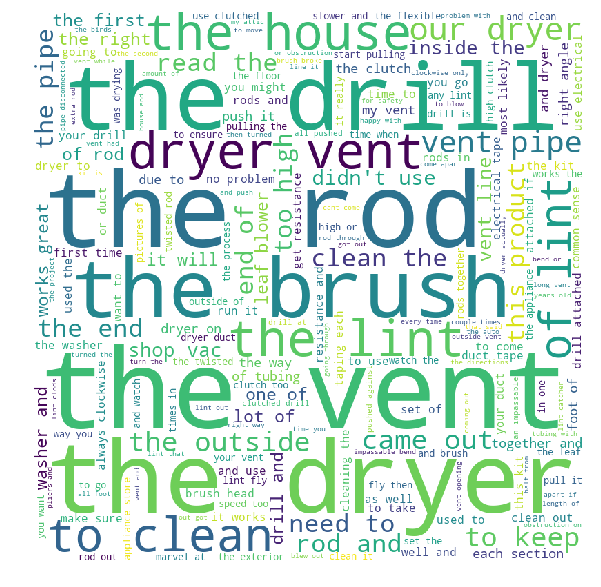

In [5]:

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import load
# Reads data files
#df = load.loadDF()


comment_words = '' 
stopwords = set(STOPWORDS) 


# iterate through the csv file 
for val in df[df['category']=='Appliances'].reviewText: 
      
    # typecaste each val to string 
    val = str(val)
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 



In [6]:
comment_words.count('thi')

9378

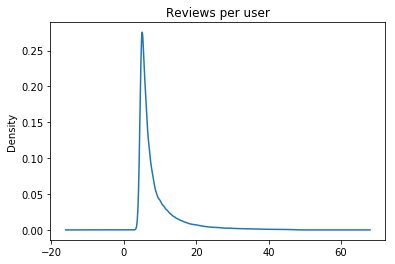

In [10]:

"""Group the data by reviewerID and take frequeny
of reviews posted. Plot the histograms"""

freq = df['reviewerID'].value_counts()
freq = freq[freq.between(freq.quantile(.01), freq.quantile(.99))]
freq.plot.kde(title = 'Reviews per user')
